## **Aim**
#### *Usually wafers pass through visual inspection, after the inspection they are classified in a few categories.* 
#### *At the moment there is a person doing the inspection, but by designing the classifier we can automate the process.*

In [132]:
import pandas as pd
import numpy as np
import cv2 as cv
import os, os.path
from PIL import Image
from numpy import moveaxis
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import array_to_img

### Data Loading

In [123]:
df  = pd.read_pickle("waferImg26x26.pkl")

In [125]:
labels   = df.labels.values
labels = np.asarray([str(l[0]) for l in labels])

In [126]:
images = df.images.values

In [144]:
images.shape

(14366,)

### Data Visualization & interpretation

In [127]:
classes = np.unique(labels, return_index=True, return_counts=True)

In [128]:
classes

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype='<U9'),
 array([  397, 10686,    99,    27,   432,   668,   395,   392,     0]),
 array([   90,     1,   296,    31,   297,    16,    74,    72, 13489]))

In [146]:
single_image = images[10686]
print(single_image.shape)
inv_channel_img = moveaxis(single_image, 0, 2) # image channel inversion (to channel last format)
print(inv_channel_img.shape)
img_pil = array_to_img(inv_channel_img)
img_pil.show()

(3, 26, 26)
(26, 26, 3)


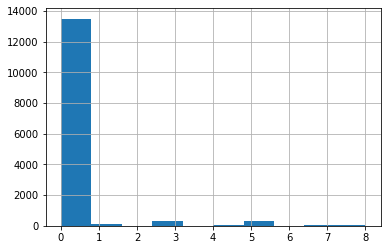

In [140]:
df.labels.hist()

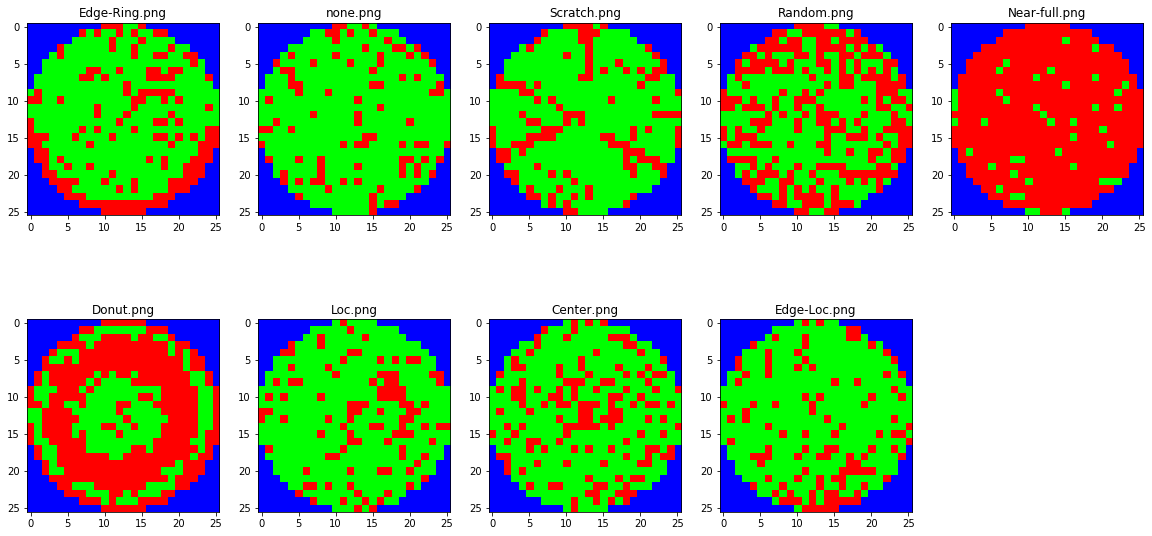

In [134]:
# Visualization Charts
func1 = lambda img: cv.imread("images/"+img)
img_samplename = os.listdir("images")
display_sample = np.array([func1(xi) for xi in os.listdir("images")])

plt.figure(figsize=(20,10))
columns = 5
for i, img in enumerate(display_sample):
    plt.subplot(len(display_sample) / columns + 1, columns, i + 1)
    plt.title(img_samplename[i])
    plt.imshow(img)

### Data Manipulation

In [6]:
df_none = df.loc[df['labels'] == 0]

In [7]:
df.drop(df[df.labels == 0].index, inplace=True)

In [14]:
print(df.shape)
print(df_none.shape)

(2026, 2)
(1000, 2)


In [9]:
df_none = df_none.sample(n = 1000)

In [10]:
df_Donut = df.loc[df['labels'] == 2]

In [11]:
df.drop(df[df.labels == 2].index, inplace=True)

In [12]:
df_Donut = pd.concat([df_Donut]*150)

In [13]:
df = pd.concat([df, df_none, df_Donut])

In [21]:
df = df.sample(frac=1)
df.reset_index()

,index,images,labels
0,11990,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",8
1,5036,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",0
2,10877,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",1
3,7301,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",1
4,10718,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",0
...,...,...,...
2021,2832,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",3
2022,10254,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",0
2023,3426,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",0
2024,1785,"[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",0


In [139]:
df["labels"].replace({"none": 0, "Center": 1, "Donut": 2, "Edge-Loc": 3, "Edge-Ring": 4, "Loc": 5,"Near-full": 6, "Random": 7, "Scratch": 8}, inplace=True)

In [30]:
func =  lambda value: moveaxis(value, 0, 2)
images2 = np.array([func(xi) for xi in images])

In [ ]:
df['images'] = df['images'].apply(lambda value: moveaxis(value, 0, 2))

In [ ]:
labels = np.asarray([l.item() for l in labels])

### Data preparation & Analysis

In [33]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# helper commands for data sampling
df_none = df.loc[df['labels'] == 0]
df_Center = df.loc[df['labels'] == 1]
df_Donut = df.loc[df['labels'] == 2]
df_Edge_Loc = df.loc[df['labels'] == 3]
df_Edge_Ring = df.loc[df['labels'] == 4]
df_Loc = df.loc[df['labels'] == 5]
df_Near_full = df.loc[df['labels'] == 6]
df_Random = df.loc[df['labels'] == 7]
df_Scratch = df.loc[df['labels'] == 8]

In [34]:
X = images2
y = to_categorical(labels)

In [36]:
X.shape

(2026, 26, 26, 3)

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train /= 255

X_val /= 255

### Training

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(26,26,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [143]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [45]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Train on 1620 samples, validate on 406 samples
Epoch 1/50
1620/1620 [==============================] - 5s 3ms/step - loss: 0.5914 - accuracy: 0.7988 - val_loss: 0.4679 - val_accuracy: 0.8596
Epoch 2/50
1620/1620 [==============================] - 5s 3ms/step - loss: 0.5623 - accuracy: 0.8154 - val_loss: 0.5267 - val_accuracy: 0.8424
Epoch 3/50
1620/1620 [==============================] - 5s 3ms/step - loss: 0.5843 - accuracy: 0.8043 - val_loss: 0.4772 - val_accuracy: 0.8547
Epoch 4/50
1620/1620 [==============================] - 5s 3ms/step - loss: 0.5213 - accuracy: 0.8265 - val_loss: 0.4649 - val_accuracy: 0.8448
Epoch 5/50
1620/1620 [==============================] - 5s 3ms/step - loss: 0.5172 - accuracy: 0.8272 - val_loss: 0.5050 - val_accuracy: 0.8128
Epoch 6/50
1620/1620 [==============================] - 6s 4ms/step - loss: 0.5334 - accuracy: 0.8111 - val_loss: 0.4983 - val_accuracy: 0.8202
Epoch 7/50
1620/1620 [==============================] - 6s 4ms/step - loss: 0.5091 - accu

In [76]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_improved.h5")
print("model saved")

model saved


### Prediction

In [ ]:
#load model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("model loded")

In [62]:
df1  = pd.read_pickle("waferImg26x26.pkl")

In [63]:
df1['images'] = df1['images'].apply(lambda value: moveaxis(value, 0, 2))

In [64]:
df1.images[0].shape

(26, 26, 3)

In [65]:
df1['labels_pred'] = np.nan

In [66]:
df1["labels"].replace({"none": 0, "Center": 1, "Donut": 2, "Edge-Loc": 3, "Edge-Ring": 4, "Loc": 5,"Near-full": 6, "Random": 7, "Scratch": 8}, inplace=True)

In [67]:
df1['labels_pred'] = df1['images'].apply(lambda value: model.predict_classes((value.reshape((-1, 26, 26, 3)))/255))

In [68]:
df1

,images,labels,labels_pred
0,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
1,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
2,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
3,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
4,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
...,...,...,...
14361,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
14362,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
14363,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]
14364,"[[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0,...",0,[0]


In [69]:
pred_labels = df1.labels.values
# pred_labels = np.asarray([l for l in pred_labels])

In [70]:
type(pred_labels[0])

numpy.int64

In [71]:
pred_labelspred = df1.labels_pred.values
pred_labelspred = np.asarray([l.item() for l in pred_labelspred])

In [72]:
type(pred_labelspred[0])

numpy.int64

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [74]:
print(classification_report(pred_labels, pred_labelspred, labels=[0,1,2,3,4,5,6,7,8]))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     13489
           1       0.49      0.99      0.66        90
           2       1.00      1.00      1.00         1
           3       0.64      0.91      0.75       296
           4       0.94      0.94      0.94        31
           5       0.53      0.88      0.67       297
           6       1.00      1.00      1.00        16
           7       0.99      0.92      0.95        74
           8       0.62      0.07      0.12        72

    accuracy                           0.96     14366
   macro avg       0.80      0.85      0.79     14366
weighted avg       0.97      0.96      0.96     14366

